In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim


### Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv',header=None)

# Display the first few rows of the dataset
print(data.head())



          0         1         2         3         4         5         6  \
0 -0.294118  0.487437  0.180328 -0.292929  0.000000  0.001490 -0.531170   
1 -0.882353 -0.145729  0.081967 -0.414141  0.000000 -0.207153 -0.766866   
2 -0.058824  0.839196  0.049180  0.000000  0.000000 -0.305514 -0.492741   
3 -0.882353 -0.105528  0.081967 -0.535354 -0.777778 -0.162444 -0.923997   
4  0.000000  0.376884 -0.344262 -0.292929 -0.602837  0.284650  0.887276   

          7  8  
0 -0.033333  0  
1 -0.666667  1  
2 -0.633333  0  
3  0.000000  1  
4 -0.600000  0  


In [3]:
#Total number of rows in dataframe
len(data)

759

In [4]:
print(data.describe())

                0           1           2           3           4           5  \
count  759.000000  759.000000  759.000000  759.000000  759.000000  759.000000   
mean    -0.407657    0.218563    0.176505   -0.289735   -0.323534   -0.032245   
std      0.386260    0.306419    0.201287    0.258480    0.375544    0.205376   
min     -0.882353   -0.557789   -0.606557   -0.858586   -0.966903   -0.457526   
25%     -0.764706   -0.005025    0.016393   -0.494949   -0.716312   -0.178837   
50%     -0.529412    0.165829    0.180328   -0.292929    0.000000   -0.034277   
75%      0.000000    0.407035    0.311475    0.000000    0.000000    0.087929   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                6           7           8  
count  759.000000  759.000000  759.000000  
mean    -0.663253   -0.516162    0.653491  
std      0.283056    0.400794    0.476171  
min     -0.994876   -0.966667    0.000000  
25%     -0.858241   -0.866667    0.000000  
50%   

In [5]:
data.columns = ['Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6','Feature 7','Feature 8','Target']

### Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [6]:
#Checking the columns null values.
print(data.isnull().sum())

Feature 1    0
Feature 2    0
Feature 3    0
Feature 4    0
Feature 5    0
Feature 6    0
Feature 7    0
Feature 8    0
Target       0
dtype: int64


In [7]:
#Standardization of independent variables.
scaler = StandardScaler()
data.iloc[:,:-1] = scaler.fit_transform(data.iloc[:,:-1])


#### Visualizations

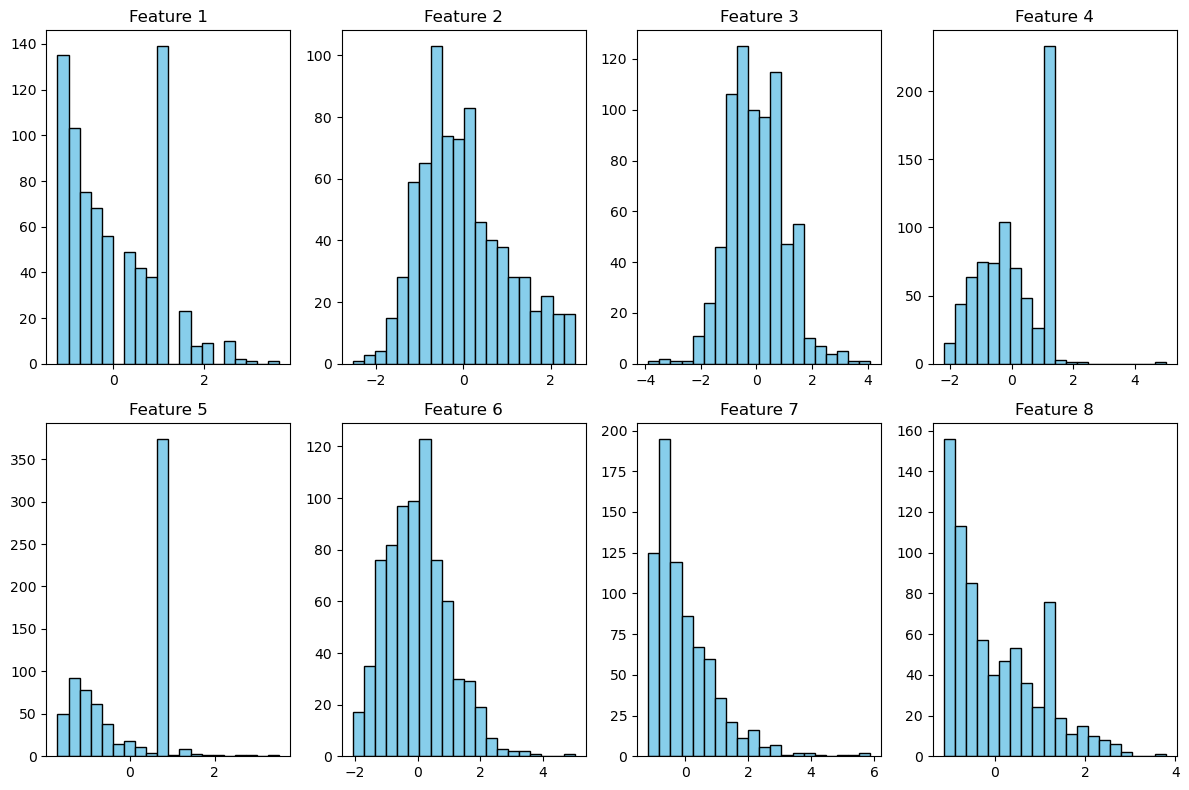

In [8]:
# Histograms of Numerical Features
plt.figure(figsize=(12, 8))
for i in range(data.iloc[:, :-1].shape[1]):
    plt.subplot(2, 4, i+1)
    plt.hist(data.iloc[:, i], bins=20, color='skyblue', edgecolor='black')
    plt.title(data.columns[i])
plt.tight_layout()
plt.show()


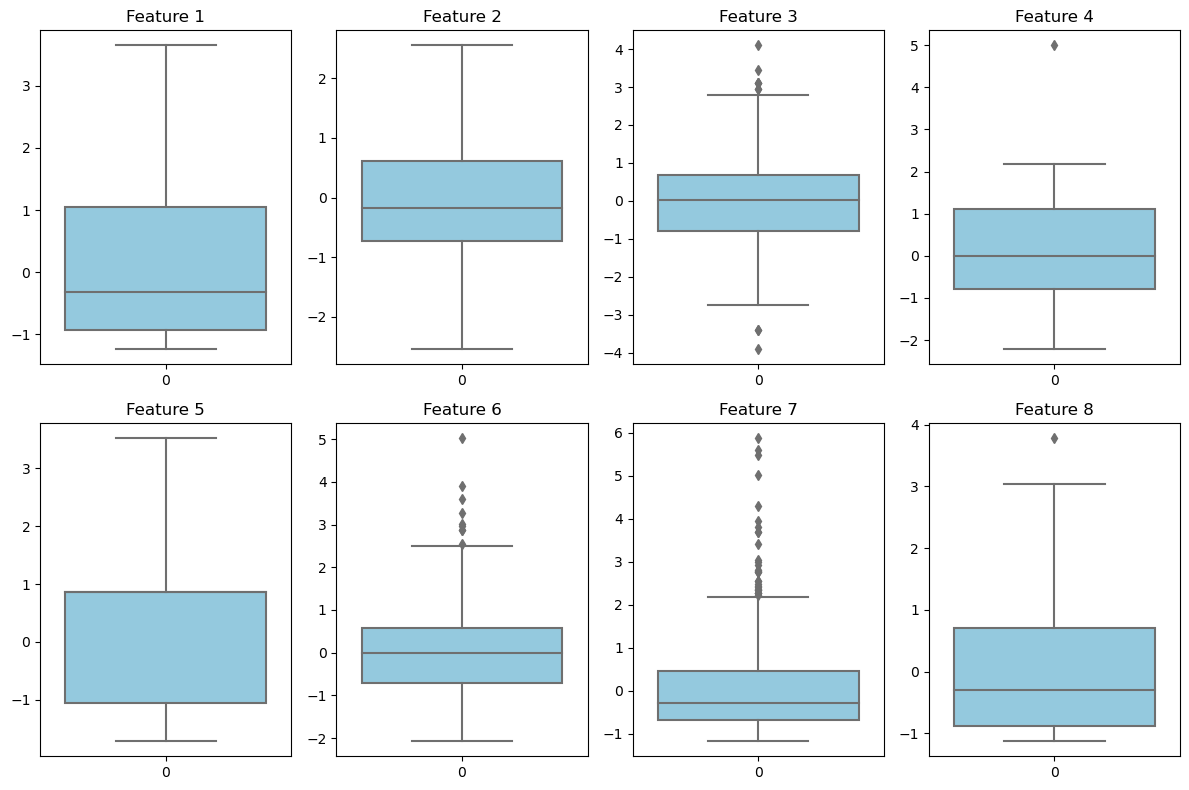

In [9]:
plt.figure(figsize=(12,8))
for i in range(data.iloc[:,:-1].shape[1]):
    plt.subplot(2,4,i+1)
    sns.boxplot(data.iloc[:,i],color='skyblue')
    plt.title(data.columns[i])
plt.tight_layout()
plt.show()

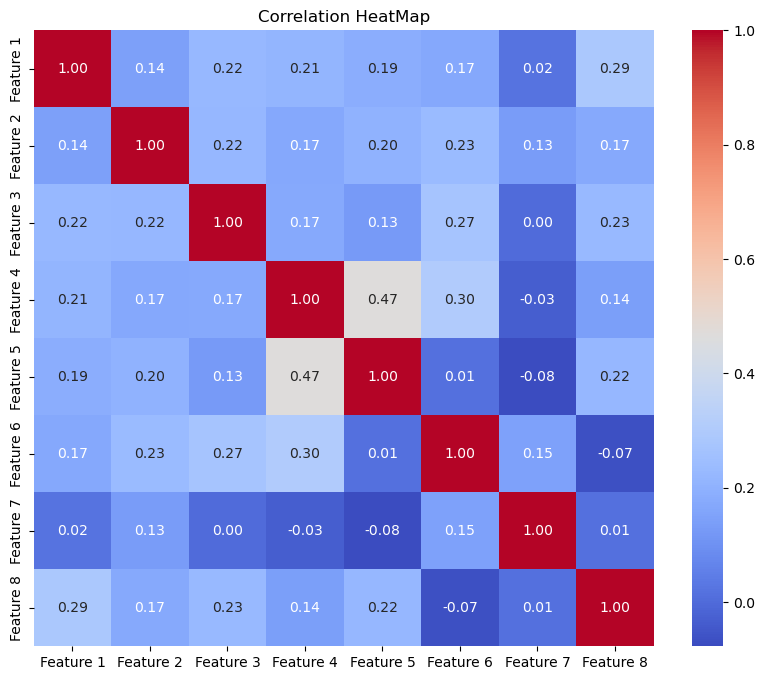

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data.iloc[:,:-1].corr(),annot = True, cmap ='coolwarm',fmt='0.2f')
plt.title('Correlation HeatMap')
plt.show()

### Step 3. Split into 80% train 20% test

In [11]:
import torch

In [12]:
#Splitting the independent features and target feature.
x = data.iloc[:, :-1]
y = data.iloc[:, -1]


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)


#Splitting the data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)



In [13]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (607, 8)
y_train shape: (607,)
x_test shape: (152, 8)
y_test shape: (152,)


### Step 4. Modify the model shown in the demo to take the new data

In [14]:
# Convert x_train,x_test,y_train,y_test data to PyTorch tensors

x_train_tensor = torch.tensor(x_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)


In [15]:
type(x_train_tensor)

torch.Tensor

In [16]:
type(y_train)

pandas.core.series.Series

In [17]:
#Printing the x_train,x_test,y_train,y_test tensors shapes
print("x_train_tensor shape:", x_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("x_test_tensor shape:", x_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

x_train_tensor shape: torch.Size([607, 8])
y_train_tensor shape: torch.Size([607])
x_test_tensor shape: torch.Size([152, 8])
y_test_tensor shape: torch.Size([152])


### Step 5. Train the model on the data

In [18]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x

# Initialize the model
model = DiabetesModel()

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor.view(-1, 1))

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6774
Epoch [20/100], Loss: 0.6616
Epoch [30/100], Loss: 0.6473
Epoch [40/100], Loss: 0.6342
Epoch [50/100], Loss: 0.6221
Epoch [60/100], Loss: 0.6106
Epoch [70/100], Loss: 0.5997
Epoch [80/100], Loss: 0.5895
Epoch [90/100], Loss: 0.5798
Epoch [100/100], Loss: 0.5705


### Step 6. Make predictions on the test data and compare them to the test labels

In [19]:
# Put the model in evaluation mode
model.eval()

# Forward pass on the test data
with torch.no_grad():
    test_outputs = model(x_test_tensor)
    # Convert the output probabilities to binary predictions
    predictions = (test_outputs >= 0.5).float()

# Convert predictions and test labels to numpy arrays for compatibility with sklearn
predictions = predictions.detach().numpy()
y_test_numpy = y_test_tensor.numpy()


### Step 7. Calculate the accuracy of your results

In [20]:
from sklearn.metrics import accuracy_score

# Flatten the arrays if needed
predictions = predictions.flatten()
y_test_numpy = y_test_numpy.flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test_numpy, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.7697368421052632


### Step 8. Hypothesize changes you can make to the model. Type out your hypothesis as comments in the code or in a text cell. (ex. doubling the width/depth of your NN, experiment thoroughly)

#### From the past model, the following changes will be done.
#### Increased the width of first two layers and added new layer fc3.
#### Now in the first layer self.fc1 has 8 inputs and 64 outputs.
#### In the second layer self.fc2 has 64 inputs and 32 outputs.
#### Adding the new layer named self.fc3 has 32 inputs and one output.
#### Sigmoid activation function is applied to the output of the second layer. 
#### Used MSELoss( ) instead of BCELoss( )
#### Adding the permutations on the training set to randomize the training sequence.

#### NEW MODEL2
#### Increased the width of first two layers, first layer has 8 inputs and 128 outputs., second layer has 128 inputs and 64 outputs, and third layer have 64 inputs and one output.
#### Increased the number of Epoch's.
#### used CategoricalCrossentropy loss instead of Binary cross entropy.

### Step 9. Test your hypothesis by training your new models

#### NEW MODEL1

In [21]:
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 64)  # Hypothesis: Increased width of the network
        self.fc2 = nn.Linear(64, 32) # Hypothesis: Increased width of the network
        self.fc3 = nn.Linear(32, 1) # Hypothesis: Added another layer
        self.sigmoid = nn.Sigmoid()  # Hypothesis: activation function is Sigmoid

    def forward(self, x):
        fc1_out = self.fc1(x)
        fc2_out = self.fc2(fc1_out)
        fc3_out = self.sigmoid(self.fc3(fc2_out)) # Hypothesis: Added the sigmoid activation for fc3(newly another layer).
        return fc3_out

# Initialize the model
model1 = DiabetesModel()

# Define loss function and optimizer
criterion = nn.MSELoss()  # Used MSELoss
optimizer = optim.Adam(model1.parameters(), lr=0.001)

# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    permutation = torch.randperm(x_train_tensor.size()[0])
    for i in range(0,x_train_tensor.shape[0],8): 
        indices = permutation[i:i+8] #Adding the permutations on the training set to randomize the training sequence.
        x = x_train_tensor[indices]
        y = y_train_tensor[indices]
        # Forward pass
        outputs = model1(x)
        loss = criterion(outputs, y.view(-1, 1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')



Epoch [10/100], Loss: 0.1453
Epoch [20/100], Loss: 0.3036
Epoch [30/100], Loss: 0.1044
Epoch [40/100], Loss: 0.2116
Epoch [50/100], Loss: 0.0448
Epoch [60/100], Loss: 0.1522
Epoch [70/100], Loss: 0.1354
Epoch [80/100], Loss: 0.2334
Epoch [90/100], Loss: 0.0354
Epoch [100/100], Loss: 0.0857


#### NEW MODEL2

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network model
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 128)  # Adjusted input size
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)  # Output layer without activation

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model
model2 = DiabetesModel()

# Define loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 150
for epoch in range(num_epochs):
    permutation = torch.randperm(x_train_tensor.size()[0])
    for i in range(0, x_train_tensor.shape[0], 8):
        indices = permutation[i:i+8]
        x = x_train_tensor[indices]
        y = y_train_tensor[indices].float()  # Convert y to float

        # Forward pass
        outputs = model2(x)
        loss = criterion(outputs.view(-1), y)  # Flatten the output for the loss function

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/150], Loss: 0.7562
Epoch [20/150], Loss: 0.7037
Epoch [30/150], Loss: 0.7702
Epoch [40/150], Loss: 0.7141
Epoch [50/150], Loss: 0.7371
Epoch [60/150], Loss: 0.6596
Epoch [70/150], Loss: 0.7321
Epoch [80/150], Loss: 0.6952
Epoch [90/150], Loss: 0.7787
Epoch [100/150], Loss: 0.7372
Epoch [110/150], Loss: 0.7142
Epoch [120/150], Loss: 0.7549
Epoch [130/150], Loss: 0.7559
Epoch [140/150], Loss: 0.7054
Epoch [150/150], Loss: 0.6464


### Step 10. Show the results of your changed models by repeating steps 6 and 7. Discuss the differences and explain why.

#### NEW MODEL 1

In [23]:
# Step 6: Make predictions on the test data
model1.eval()
with torch.no_grad():
    test_outputs = model1(x_test_tensor)
    predictions_model1 = (test_outputs >= 0.5).float()

predictions_model1 = predictions_model1.detach().numpy()
y_test_numpy = y_test_tensor.numpy()

# Step 7: Calculate the accuracy of your results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_numpy, predictions_model1.flatten())
print("Accuracy:", accuracy)


Accuracy: 0.8157894736842105


#### NEW MODEL 2

In [24]:
# Step 6: Make predictions on the test data
model2.eval()
with torch.no_grad():
    test_outputs = model2(x_test_tensor)
    predictions_model2 = (test_outputs >= 0.5).float()

predictions_mod2 = predictions_model2.detach().numpy()
y_test_numpy = y_test_tensor.numpy()

# Step 7: Calculate the accuracy of your results
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_numpy, predictions_model2.flatten())
print("Accuracy:", accuracy)


Accuracy: 0.3092105263157895


#### The loss has been decreased significantly and the accuracy has improved using the new model 1, in which new layer is created with sigmoid activation function, Used MSELoss( ) instead of BCELoss( ), added the permutations on the training set to randomize the training sequence, with these changes the accuaracy has increased and loss was decreased.

#### New model 1 accuarcy is better than new model 2, and loss of new model 1 is less than new model 2.
